**Loading all necessary packages**

In [270]:
from pyforest import*
from sklearn.utils import resample
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [109]:
import warnings
warnings.filterwarnings('ignore')

## Loading the data, the first observation, and EDA

In [110]:
df=pd.read_csv('bank-full+(1).csv')

<IPython.core.display.Javascript object>

In [111]:
df.shape

(45211, 17)

In [112]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [113]:
#The data type of each attribute
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [114]:
#Checking the presence of missing values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [115]:
#Point summary of numerical attributes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

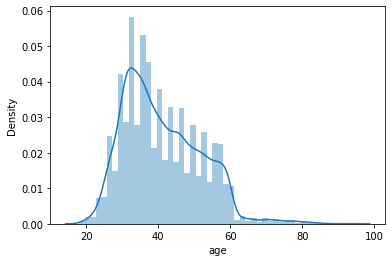

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

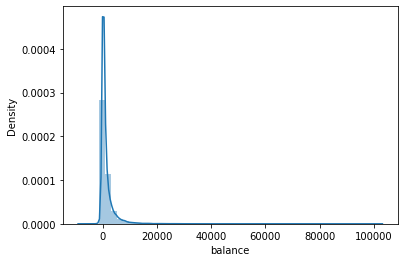

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

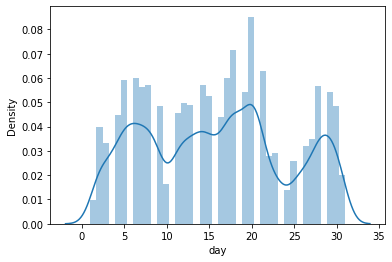

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

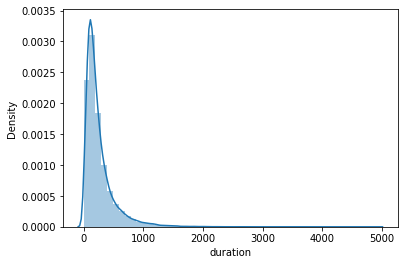

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

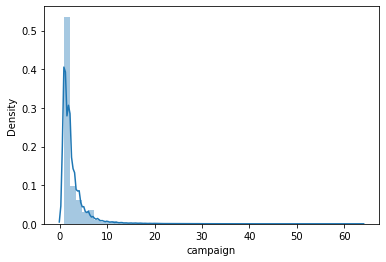

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

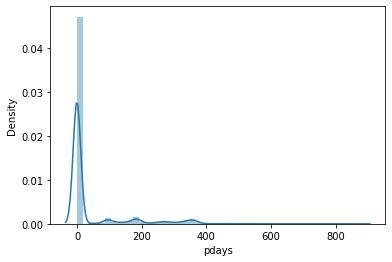

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

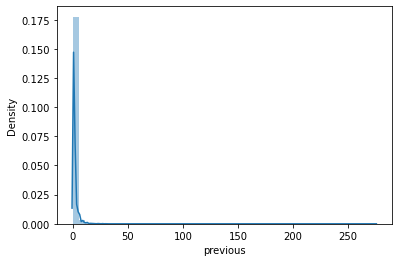

In [116]:
for i in df.describe().columns:
    sns.distplot(df[i]) #there is no na in the dataframe as it is clear from the previous lines, and so there is
    plt.show()                    #need to use .dropna

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

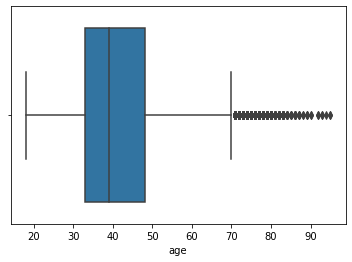

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

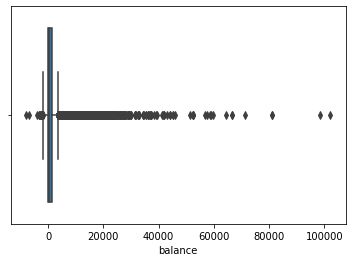

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

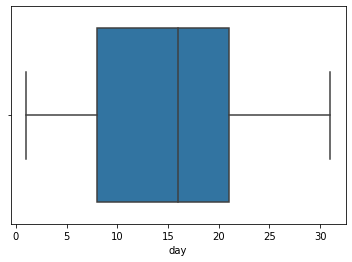

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

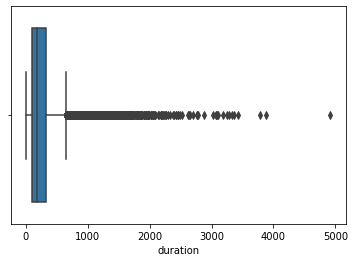

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

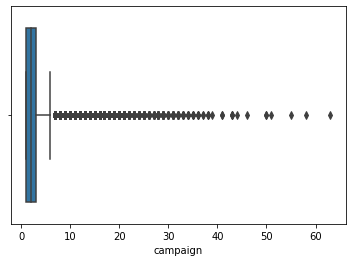

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

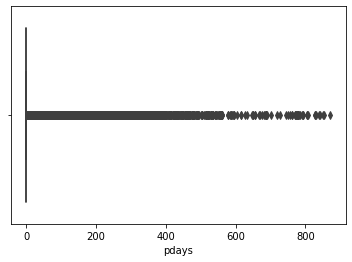

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

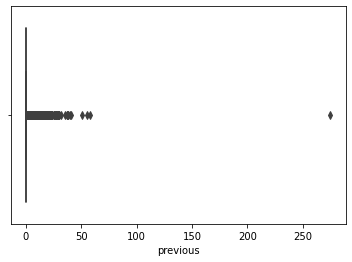

In [117]:
#Checking the presence of outliers
for i in df.describe().columns:
    sns.boxplot(df[i])
    plt.show()

## Prepare the data to train a model

### Categorical Features

**job**

In [118]:
df.job.value_counts() #there is 'unknown' data that should be handled.

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [119]:
df['job'] = df['job'].replace({'unknown':'blue-collar'}) 

In [120]:
df.job.value_counts() #'unknown' replaced by the mode of the column ('blue-collar').

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

**marital**

In [121]:
df.marital.value_counts() #there is no 'unknown' data, so it is good to go.

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

**education**

In [122]:
df.education.value_counts() #there is 'unknown' data that should be handled.

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [123]:
df['education'] = df['education'].replace({'unknown':'secondary'})

In [124]:
df.education.value_counts() #'unknown' replaced by the mode of the column ('secondary').

secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64

**default**

In [125]:
df.default.value_counts() #there is no 'unknown' data, so it is good to go.

no     44396
yes      815
Name: default, dtype: int64

**housing**

In [126]:
df.housing.value_counts() #there is no 'unknown' data, so it is good to go.

yes    25130
no     20081
Name: housing, dtype: int64

**loan**

In [127]:
df.loan.value_counts() #there is no 'unknown' data, so it is good to go.

no     37967
yes     7244
Name: loan, dtype: int64

**contact**

In [128]:
df.contact.value_counts() #there is 'unknown' data that should be handled.

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [129]:
df['contact'] = df['contact'].replace({'unknown':'cellular'})

In [130]:
df.contact.value_counts() #'unknown' replaced by the mode of the column ('cellular').

cellular     42305
telephone     2906
Name: contact, dtype: int64

**month**

In [131]:
df.month.value_counts() #there is no 'unknown' data, so it is good to go.

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

**poutcome**

In [132]:
df.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

Beacuse most of the data in 'poutcome' column is unknown, it would not be a helpful data for the classification. Therefor I will drop it.

In [133]:
df.drop(['poutcome'], axis=1, inplace=True)

In [134]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,Target
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,no


### Numerical Features

In [135]:
#As mentioned in the Data Description, the 'duration' column, would not be helpful. So, I'm droping it.
df.drop(['duration'], axis=1, inplace=True)

**pdays**

In [136]:
df.pdays.describe() 

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [137]:
(df.pdays < 0).sum() #Nearly all the data in pdays column is -1 which is not a meaningful data. So I'm droping it.

36954

In [138]:
df.drop(['pdays'], axis=1, inplace=True)

In [139]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,Target
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,1,0,no


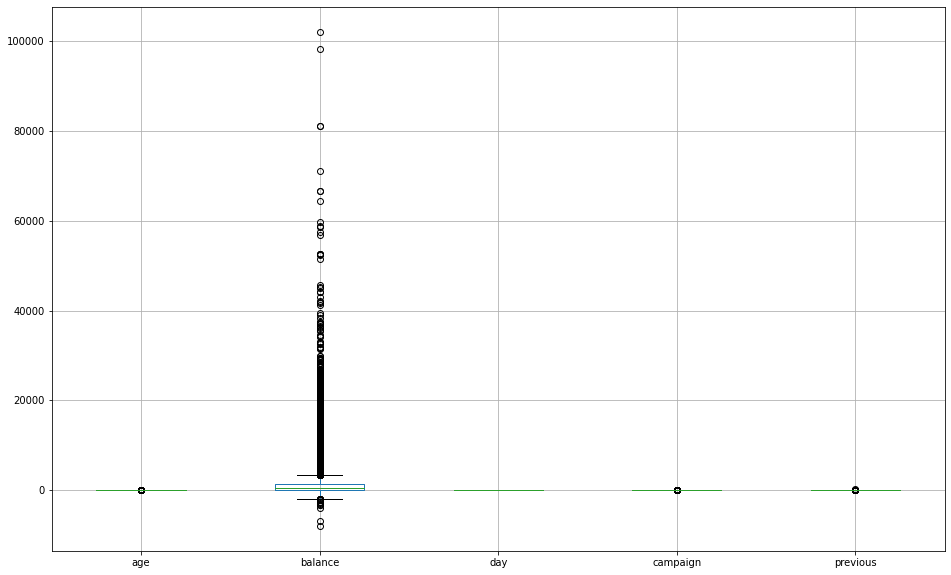

In [140]:
df.boxplot(figsize=(16,10))

As it is clear from the above boxplot for numerical features there ar lots of outliers that should be handled. And also, the data should be normalized.

In [141]:
# Handling Outliers

cols_of_interest = ['age', 'balance', 'campaign', 'previous']

for col in cols_of_interest:
    Q1=df[col].quantile(q=0.25)
    Q3=df[col].quantile(q=0.75)
    IQR=Q3-Q1
    L_outliers=Q1-1.5*(IQR)
    U_outliers=Q3+1.5*(IQR)
    df.loc[(df[col] < L_outliers) | (df[col] > U_outliers), col] = df[col].median()

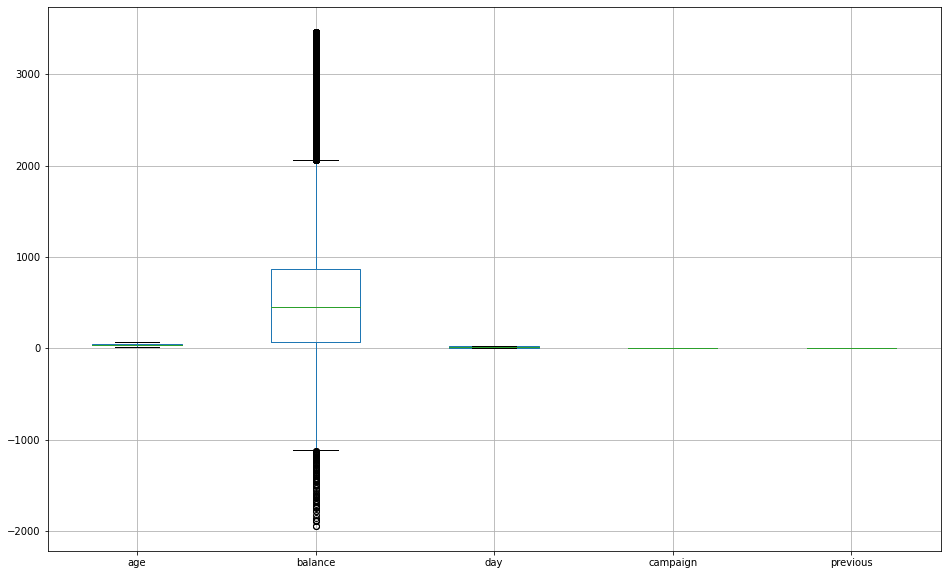

In [142]:
df.boxplot(figsize=(16,10))

### Target column cheking for imbalancity.

In [143]:
df['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

Clearly the data is imbalance. So it should be cared.

**Up Sampling**

Prior to upsampling the data should be divide into train and test. The class that should be upsampled is **'yes'**.

In [144]:
X=df.drop('Target',axis=1)
y=df['Target']

In [145]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

<IPython.core.display.Javascript object>

In [146]:
X=pd.concat([X_train,y_train],axis=1)
X.head()

<IPython.core.display.Javascript object>

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,Target
32731,29,blue-collar,married,secondary,no,137,yes,no,cellular,17,apr,2,0,no
1498,39,blue-collar,married,primary,no,830,yes,no,cellular,8,may,2,0,no
17532,30,technician,married,tertiary,no,1103,yes,yes,cellular,29,jul,2,0,no
8166,25,services,single,secondary,no,229,yes,no,cellular,2,jun,2,0,no
15495,32,management,married,secondary,no,2858,yes,yes,cellular,18,jul,5,0,no


In [147]:
subscribed=X[X['Target']=='yes']
not_subscribed=X[X['Target']=='no']

In [148]:
subscribed_upsampled=resample(subscribed,replace=True, n_samples=len(not_subscribed), random_state=1)

upsampled=pd.concat([not_subscribed, subscribed_upsampled])

<IPython.core.display.Javascript object>

In [149]:
upsampled['Target'].value_counts()

yes    29924
no     29924
Name: Target, dtype: int64

In [150]:
X_train=upsampled.drop('Target', axis=1)
y_train=upsampled['Target']

## Normalization

In [151]:
scaler=StandardScaler()

<IPython.core.display.Javascript object>

In [152]:
cols_to_normalize=['age', 'balance', 'campaign', 'previous']

In [153]:
train_numcols= X_train[cols_to_normalize]
train_numcols=pd.DataFrame(scaler.fit_transform(train_numcols))
train_numcols.columns = cols_to_normalize

<IPython.core.display.Javascript object>

In [154]:
X_train.drop(cols_to_normalize, axis=1, inplace=True)
X_train=X_train.reset_index()
X_train = pd.concat([X_train, train_numcols], axis=1)

<IPython.core.display.Javascript object>

In [155]:
X_train.drop(['index'],axis=1,inplace=True)
X_train.head()

,job,marital,education,default,housing,loan,contact,day,month,age,balance,campaign,previous
0,blue-collar,married,secondary,no,yes,no,cellular,17,apr,-1.072548,-0.678187,-0.026158,0.0
1,blue-collar,married,primary,no,yes,no,cellular,8,may,-0.123830,0.153503,-0.026158,0.0
2,technician,married,tertiary,no,yes,yes,cellular,29,jul,-0.977676,0.481138,-0.026158,0.0
3,services,single,secondary,no,yes,no,cellular,2,jun,-1.452035,-0.567775,-0.026158,0.0
4,management,married,secondary,no,yes,yes,cellular,18,jul,-0.787933,2.587364,2.408530,0.0


In [156]:
test_numcols= X_test[cols_to_normalize]
test_numcols=pd.DataFrame(scaler.fit_transform(test_numcols))
test_numcols.columns = cols_to_normalize

<IPython.core.display.Javascript object>

In [157]:
X_test.drop(cols_to_normalize, axis=1, inplace=True)
X_test=X_test.reset_index()
X_test = pd.concat([X_test, test_numcols], axis=1)

<IPython.core.display.Javascript object>

In [158]:
X_test.drop(['index'],axis=1,inplace=True)
X_test.head()

,job,marital,education,default,housing,loan,contact,day,month,age,balance,campaign,previous
0,blue-collar,married,primary,no,yes,no,cellular,15,may,0.148653,2.383245,1.479583,0.0
1,technician,married,secondary,no,no,no,cellular,20,jun,-0.352937,1.994347,-0.086896,0.0
2,admin.,married,secondary,no,yes,no,cellular,17,apr,-0.854527,0.381048,1.479583,0.0
3,blue-collar,married,primary,no,no,no,cellular,28,jul,1.252152,-0.392984,0.696344,0.0
4,technician,single,tertiary,no,yes,no,cellular,2,jun,-0.854527,-0.454455,2.262823,0.0


## Handling Categorical Features

In [159]:
y_train=y_train.reset_index()
train = pd.concat([X_train, y_train], axis=1)

<IPython.core.display.Javascript object>

In [160]:
y_test=y_test.reset_index()
test = pd.concat([X_test, y_test], axis=1)

<IPython.core.display.Javascript object>

In [161]:
train['source']='train'
test['source']='test'
newdf=pd.concat([train, test], ignore_index=True)
newdf.drop(['index'], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [162]:
label=LabelEncoder()

cat_features=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','day', 'month']

for i in cat_features:
    newdf[i] = label.fit_transform(newdf[i])

<IPython.core.display.Javascript object>

In [163]:
newdf.head()

,job,marital,education,default,housing,loan,contact,day,month,age,balance,campaign,previous,Target,source
0,1,1,1,0,1,0,0,16,0,-1.072548,-0.678187,-0.026158,0.0,no,train
1,1,1,0,0,1,0,0,7,8,-0.123830,0.153503,-0.026158,0.0,no,train
2,9,1,2,0,1,1,0,28,5,-0.977676,0.481138,-0.026158,0.0,no,train
3,7,2,1,0,1,0,0,1,6,-1.452035,-0.567775,-0.026158,0.0,no,train
4,4,1,1,0,1,1,0,17,5,-0.787933,2.587364,2.408530,0.0,no,train


In [164]:
newdf=pd.get_dummies(newdf, columns=['job', 'marital', 'education', 'default', 
                               'housing', 'loan', 'contact','day', 'month'])

<IPython.core.display.Javascript object>

In [165]:
newdf.head()

,age,balance,campaign,previous,Target,source,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,marital_0,marital_1,marital_2,education_0,education_1,education_2,default_0,default_1,housing_0,housing_1,loan_0,loan_1,contact_0,contact_1,day_0,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11
0,-1.072548,-0.678187,-0.026158,0.0,no,train,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,-0.123830,0.153503,-0.026158,0.0,no,train,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,-0.977676,0.481138,-0.026158,0.0,no,train,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-1.452035,-0.567775,-0.026158,0.0,no,train,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,-0.787933,2.587364,2.408530,0.0,no,train,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [166]:
train = newdf.loc[newdf['source'] == 'train']
test = newdf.loc[newdf['source'] == 'test']

In [167]:
train.drop(['source'], axis=1, inplace=True)
train.head()

,age,balance,campaign,previous,Target,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,marital_0,marital_1,marital_2,education_0,education_1,education_2,default_0,default_1,housing_0,housing_1,loan_0,loan_1,contact_0,contact_1,day_0,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11
0,-1.072548,-0.678187,-0.026158,0.0,no,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,-0.123830,0.153503,-0.026158,0.0,no,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,-0.977676,0.481138,-0.026158,0.0,no,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-1.452035,-0.567775,-0.026158,0.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,-0.787933,2.587364,2.408530,0.0,no,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [168]:
test.drop(['source'], axis=1, inplace=True)
test.head()

,age,balance,campaign,previous,Target,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,marital_0,marital_1,marital_2,education_0,education_1,education_2,default_0,default_1,housing_0,housing_1,loan_0,loan_1,contact_0,contact_1,day_0,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11
59848,0.148653,2.383245,1.479583,0.0,no,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
59849,-0.352937,1.994347,-0.086896,0.0,no,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
59850,-0.854527,0.381048,1.479583,0.0,no,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
59851,1.252152,-0.392984,0.696344,0.0,yes,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
59852,-0.854527,-0.454455,2.262823,0.0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [169]:
X_train = train.drop(['Target'], axis=1)
X_test = test.drop(['Target'], axis=1)
y_train = train['Target']
y_test = test['Target']

## Model Building

### Logistic Regression

In [170]:
LR=LogisticRegression(random_state=1)

LR.fit(X_train,y_train)

<IPython.core.display.Javascript object>

LogisticRegression(random_state=1)

In [181]:
train_score=LR.score(X_train, y_train)
train_score

0.6769816869402486

In [182]:
test_score=LR.score(X_test, y_test)
test_score

0.7099000265416261

In [183]:
LR_pred=LR.predict(X_test)

In [184]:
cm=metrics.confusion_matrix(y_test,LR_pred,labels=['no','yes'])
cm

<IPython.core.display.Javascript object>

array([[7192, 2806],
       [ 473,  832]])

In [185]:
df_cm=pd.DataFrame(cm,index=[i for i in ['Real no','Real yes']],columns=[i for i in ['Predicted no', 'Predicted yes']])
df_cm

<IPython.core.display.Javascript object>

,Predicted no,Predicted yes
Real no,7192,2806
Real yes,473,832


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

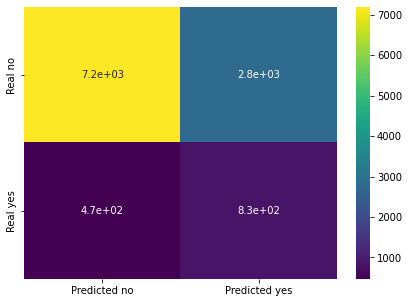

In [186]:
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,cmap='viridis');

In [187]:
print(classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

          no       0.94      0.72      0.81      9998
         yes       0.23      0.64      0.34      1305

    accuracy                           0.71     11303
   macro avg       0.58      0.68      0.58     11303
weighted avg       0.86      0.71      0.76     11303



In [190]:
results_LR = pd.DataFrame({'Algorithm': ['Logistic Regression'],'Model Score on Train':train_score, 
                           'Model Score on Test':test_score},index={'1'})
results = results_LR[['Algorithm','Model Score on Train','Model Score on Test']]
results

<IPython.core.display.Javascript object>

,Algorithm,Model Score on Train,Model Score on Test
1,Logistic Regression,0.676982,0.7099


### SVM

In [79]:
svm=SVC()

svm.fit(X_train,y_train)

SVC()

In [80]:
train_score=svm.score(X_train, y_train)
train_score

0.8064764068974736

In [81]:
test_score=svm.score(X_test, y_test)
test_score

0.7850128284526232

In [82]:
svm_pred=svm.predict(X_test)

In [83]:
cm=metrics.confusion_matrix(y_test,svm_pred,labels=['no','yes'])
cm

<IPython.core.display.Javascript object>

array([[8107, 1891],
       [ 539,  766]])

In [84]:
df_cm=pd.DataFrame(cm,index=[i for i in ['Real no','Real yes']],columns=[i for i in ['Predicted no', 'Predicted yes']])
df_cm

<IPython.core.display.Javascript object>

,Predicted no,Predicted yes
Real no,8107,1891
Real yes,539,766


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

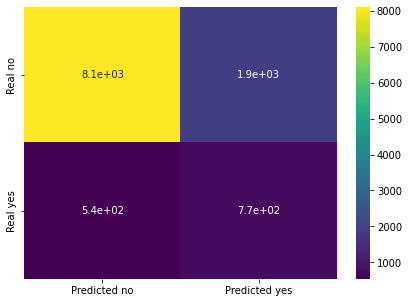

In [85]:
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,cmap='viridis');

In [86]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

          no       0.94      0.81      0.87      9998
         yes       0.29      0.59      0.39      1305

    accuracy                           0.79     11303
   macro avg       0.61      0.70      0.63     11303
weighted avg       0.86      0.79      0.81     11303



In [192]:
result_svm = pd.DataFrame({'Algorithm': ['SVM'], 'Model Score on Train':train_score, 
                           'Model Score on Test':test_score},index={'2'})
results = pd.concat([results, result_svm])
results = results[['Algorithm','Model Score on Train','Model Score on Test']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Model Score on Train,Model Score on Test
1,Logistic Regression,0.676982,0.709900
2,SVM,0.806476,0.785013


### Decission Tree

In [193]:
DT=DecisionTreeClassifier()

DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [194]:
train_score=DT.score(X_train, y_train)
train_score

0.9999164550193824

In [195]:
test_score=DT.score(X_test, y_test)
test_score

0.8168627797929753

In [196]:
DT_pred=DT.predict(X_test)

In [197]:
cm=metrics.confusion_matrix(y_test,DT_pred,labels=['no','yes'])
cm

<IPython.core.display.Javascript object>

array([[8867, 1131],
       [ 939,  366]])

In [198]:
df_cm=pd.DataFrame(cm,index=[i for i in ['Real no','Real yes']],columns=[i for i in ['Predicted no', 'Predicted yes']])
df_cm

<IPython.core.display.Javascript object>

,Predicted no,Predicted yes
Real no,8867,1131
Real yes,939,366


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

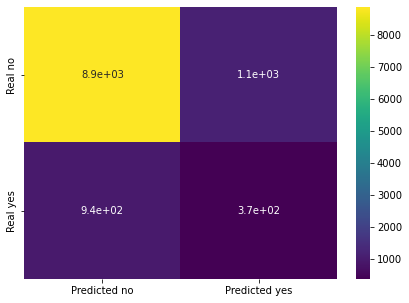

In [199]:
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,cmap='viridis');

In [200]:
print(classification_report(y_test, DT_pred))

              precision    recall  f1-score   support

          no       0.90      0.89      0.90      9998
         yes       0.24      0.28      0.26      1305

    accuracy                           0.82     11303
   macro avg       0.57      0.58      0.58     11303
weighted avg       0.83      0.82      0.82     11303



In [240]:
result_DT = pd.DataFrame({'Algorithm': ['Decision Tree'], 'Model Score on Train':train_score, 
                           'Model Score on Test':test_score},index={'3'})
results = pd.concat([results, result_DT])
results = results[['Algorithm','Model Score on Train','Model Score on Test']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Model Score on Train,Model Score on Test
1,Logistic Regression,0.676982,0.709900
2,SVM,0.806476,0.785013
3,Decision Tree,0.999916,0.816863


### KNN

In [224]:
k=[1,3,5,7,9,11,13,15]
test=[]
train=[]
for i in k:
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  train.append(knn.score(X_train,y_train))
  test.append(knn.score(X_test,y_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Score')

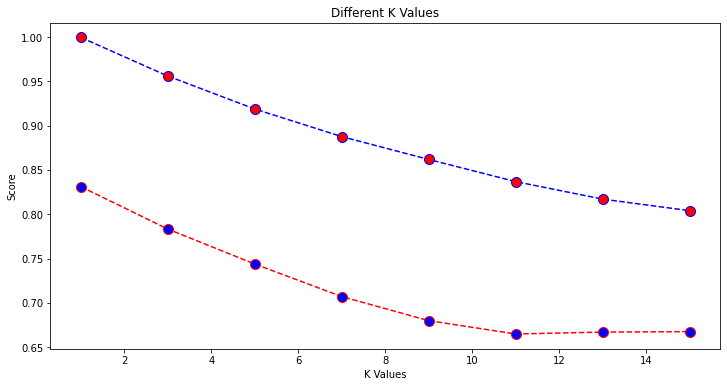

In [227]:
plt.figure(figsize=(12,6))
plt.plot(k,train,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.plot(k,test,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Different K Values')
plt.xlabel('K Values')
plt.ylabel('Score')

In [228]:
knn=KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [229]:
train_score=knn.score(X_train, y_train)
train_score

0.8040201844673172

In [241]:
test_score=knn.score(X_test, y_test)
test_score

0.6675218968415465

In [242]:
knn_pred=knn.predict(X_test)

In [243]:
cm=metrics.confusion_matrix(y_test,knn_pred,labels=['no','yes'])

<IPython.core.display.Javascript object>

In [244]:
df_cm=pd.DataFrame(cm,index=[i for i in ['Real no','Real yes']],columns=[i for i in ['Predicted no', 'Predicted yes']])
df_cm

<IPython.core.display.Javascript object>

,Predicted no,Predicted yes
Real no,6773,3225
Real yes,533,772


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

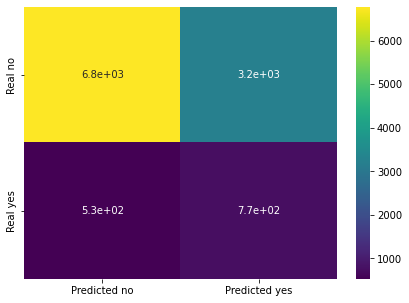

In [245]:
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,cmap='viridis');

In [247]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

          no       0.93      0.68      0.78      9998
         yes       0.19      0.59      0.29      1305

    accuracy                           0.67     11303
   macro avg       0.56      0.63      0.54     11303
weighted avg       0.84      0.67      0.73     11303



In [250]:
result_knn = pd.DataFrame({'Algorithm': ['KNN'], 'Model Score on Train':train_score, 
                           'Model Score on Test':test_score},index={'4'})
results = pd.concat([results, result_knn])
results = results[['Algorithm','Model Score on Train','Model Score on Test']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Model Score on Train,Model Score on Test
1,Logistic Regression,0.676982,0.709900
2,SVM,0.806476,0.785013
3,Decision Tree,0.999916,0.816863
4,KNN,0.999916,0.667522


### Random Forest

In [251]:
rfc=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=1)

rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=1)

In [252]:
train_score=rfc.score(X_train, y_train)
train_score

0.9999164550193824

In [253]:
test_score=rfc.score(X_test, y_test)
test_score

0.8696806157657259

In [254]:
rfc_pred=rfc.predict(X_test)

In [255]:
cm=metrics.confusion_matrix(y_test,rfc_pred,labels=['no','yes'])
cm

<IPython.core.display.Javascript object>

array([[9514,  484],
       [ 989,  316]])

In [256]:
df_cm=pd.DataFrame(cm,index=[i for i in ['Real no','Real yes']],columns=[i for i in ['Predicted no', 'Predicted yes']])
df_cm

<IPython.core.display.Javascript object>

,Predicted no,Predicted yes
Real no,9514,484
Real yes,989,316


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

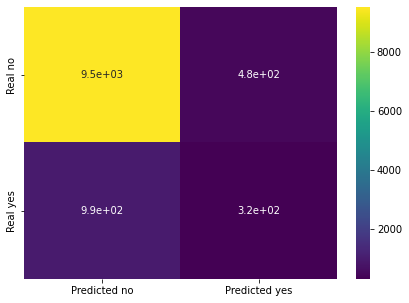

In [257]:
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,cmap='viridis');

In [258]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

          no       0.91      0.95      0.93      9998
         yes       0.40      0.24      0.30      1305

    accuracy                           0.87     11303
   macro avg       0.65      0.60      0.61     11303
weighted avg       0.85      0.87      0.86     11303



In [259]:
result_rfc = pd.DataFrame({'Algorithm': ['Random Forest'], 'Model Score on Train':train_score, 
                           'Model Score on Test':test_score},index={'5'})
results = pd.concat([results, result_rfc])
results = results[['Algorithm','Model Score on Train','Model Score on Test']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Model Score on Train,Model Score on Test
1,Logistic Regression,0.676982,0.709900
2,SVM,0.806476,0.785013
3,Decision Tree,0.999916,0.816863
4,KNN,0.999916,0.667522
5,Random Forest,0.999916,0.869681


### Gradiant Boost

In [261]:
GB=GradientBoostingClassifier()

GB.fit(X_train,y_train)

GradientBoostingClassifier()

In [262]:
train_score=GB.score(X_train, y_train)
train_score

0.7077262398075124

In [263]:
test_score=GB.score(X_test, y_test)
test_score

0.7233477837742193

In [264]:
GB_pred=GB.predict(X_test)

In [265]:
cm=metrics.confusion_matrix(y_test,GB_pred,labels=['no','yes'])

<IPython.core.display.Javascript object>

In [266]:
df_cm=pd.DataFrame(cm,index=[i for i in ['Real no','Real yes']],columns=[i for i in ['Predicted no', 'Predicted yes']])
df_cm

<IPython.core.display.Javascript object>

,Predicted no,Predicted yes
Real no,7335,2663
Real yes,464,841


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

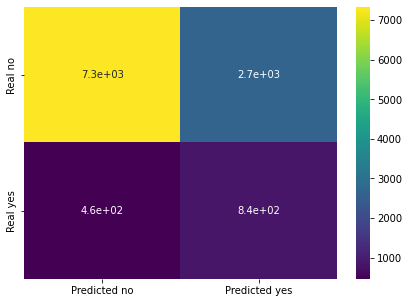

In [267]:
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,cmap='viridis');

In [268]:
print(classification_report(y_test, GB_pred))

              precision    recall  f1-score   support

          no       0.94      0.73      0.82      9998
         yes       0.24      0.64      0.35      1305

    accuracy                           0.72     11303
   macro avg       0.59      0.69      0.59     11303
weighted avg       0.86      0.72      0.77     11303



In [269]:
result_GB = pd.DataFrame({'Algorithm': ['Gradiant Boost'], 'Model Score on Train':train_score, 
                           'Model Score on Test':test_score},index={'6'})
results = pd.concat([results, result_GB])
results = results[['Algorithm','Model Score on Train','Model Score on Test']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Model Score on Train,Model Score on Test
1,Logistic Regression,0.676982,0.709900
2,SVM,0.806476,0.785013
3,Decision Tree,0.999916,0.816863
4,KNN,0.999916,0.667522
5,Random Forest,0.999916,0.869681
6,Gradiant Boost,0.707726,0.723348


### Ada Boost

In [271]:
AB=AdaBoostClassifier()

AB.fit(X_train,y_train)

AdaBoostClassifier()

In [272]:
train_score=AB.score(X_train, y_train)
train_score

0.6850521320679054

In [273]:
test_score=AB.score(X_test, y_test)
test_score

0.697779350614881

In [274]:
AB_pred=AB.predict(X_test)

In [275]:
cm=metrics.confusion_matrix(y_test,AB_pred,labels=['no','yes'])

<IPython.core.display.Javascript object>

In [276]:
df_cm=pd.DataFrame(cm,index=[i for i in ['Real no','Real yes']],columns=[i for i in ['Predicted no', 'Predicted yes']])
df_cm

<IPython.core.display.Javascript object>

,Predicted no,Predicted yes
Real no,7037,2961
Real yes,455,850


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

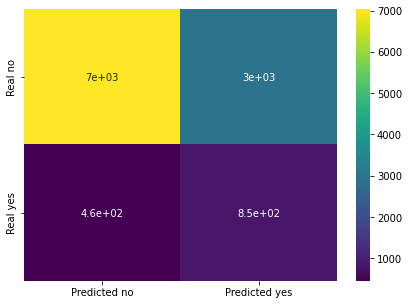

In [277]:
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,cmap='viridis');

In [278]:
print(classification_report(y_test, AB_pred))

              precision    recall  f1-score   support

          no       0.94      0.70      0.80      9998
         yes       0.22      0.65      0.33      1305

    accuracy                           0.70     11303
   macro avg       0.58      0.68      0.57     11303
weighted avg       0.86      0.70      0.75     11303



In [279]:
result_AB = pd.DataFrame({'Algorithm': ['Ada Boost'], 'Model Score on Train':train_score, 
                           'Model Score on Test':test_score},index={'7'})
results = pd.concat([results, result_AB])
results = results[['Algorithm','Model Score on Train','Model Score on Test']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Model Score on Train,Model Score on Test
1,Logistic Regression,0.676982,0.709900
2,SVM,0.806476,0.785013
3,Decision Tree,0.999916,0.816863
4,KNN,0.999916,0.667522
5,Random Forest,0.999916,0.869681
6,Gradiant Boost,0.707726,0.723348
7,Ada Boost,0.685052,0.697779


## Comparing All Models

In [294]:
data = results.melt('Algorithm', var_name='Train/Test', value_name='Score')
data

,Algorithm,Train/Test,Score
0,Logistic Regression,Model Score on Train,0.676982
1,SVM,Model Score on Train,0.806476
2,Decision Tree,Model Score on Train,0.999916
3,KNN,Model Score on Train,0.999916
4,Random Forest,Model Score on Train,0.999916
5,Gradiant Boost,Model Score on Train,0.707726
6,Ada Boost,Model Score on Train,0.685052
7,Logistic Regression,Model Score on Test,0.709900
8,SVM,Model Score on Test,0.785013
9,Decision Tree,Model Score on Test,0.816863


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

<Figure size 1440x576 with 0 Axes>

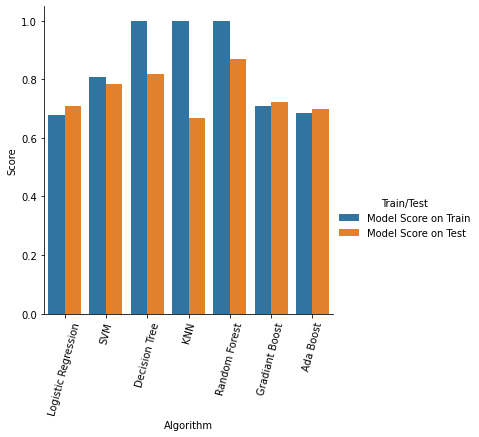

In [298]:
plt.figure(figsize=(20, 8))
sns.catplot(x="Algorithm", y="Score", hue="Train/Test", kind="bar", data=data)
plt.xticks(rotation=75)

As it is clear from the above bar plot Ensemble models are generaly more resistance against **over fitting** than base models.
KNN has the most over fitting. I believe that it is beacuse of the fact that I did not find the best neighbor number for this model. 
Both Decision Tree and Random forest are equal in model score on train data, but Random Forest is bit better in model score on test data, which can be translate to less overfitting, which is the power of ensemble methods.  